# Objective

This notebook brings together different modeling outputs together for side by side comparison in the presentation.

In [81]:
# show every character in every column
pd.set_option("display.max_colwidth", None)   # for pandas ≥ 1.0
# pd.set_option("display.max_colwidth", -1)   # for very old pandas versions

# if you also want to see more columns / rows on-screen
pd.set_option("display.max_columns", None)    # never abbreviate with …
pd.set_option("display.max_rows",    None)

# Bring in saved data

In [83]:
import json
import pandas as pd

# File paths
Adaboost_Cliff_data = r"C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\Adaboost_Cliff_data.csv"
Adaboost_GHG = r"C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\Adaboost_GHG.csv"

ghg_HLM = r"C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\ghg_HLM.csv"
ghg_HLM_feat_reduced_w_resid_mod = r"C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\ghg_HLM_feat_reduced_w_resid_mod.csv"


df_Adaboost_Win_data= pd.read_csv(Adaboost_Cliff_data)
df_Adaboost_GHG = pd.read_csv(Adaboost_GHG)
df_ghg_HLM = pd.read_csv(ghg_HLM)
df_ghg_HLM_feat_reduced_w_resid_mod = pd.read_csv(ghg_HLM_feat_reduced_w_resid_mod)

df_Adaboost_Win_data.rename(columns={"Unnamed: 0": "Scope 3 Category"}, inplace=True)
df_Adaboost_GHG.rename(columns={"Unnamed: 0": "Scope 3 Category"}, inplace=True)
df_ghg_HLM.rename(columns={"Unnamed: 0": "Scope 3 Category"}, inplace=True)
df_ghg_HLM_feat_reduced_w_resid_mod.rename(columns={"Unnamed: 0": "Scope 3 Category"}, inplace=True)


In [93]:
df_Adaboost_Win_data.head(20)

,Scope 3 Category,R²(log)%,MAPE_log%,MAPE_orig%,RMSLE,RMSE_orig,MAE_orig
0,Business travel,67.7,17.7,1321.9,1.23,469296.26,28489.62
1,Capital goods,67.6,14.5,2828.1,1.49,6893313.98,356787.92
2,Downstream leased assets,71.9,21.7,1659.2,1.53,14827308.35,881505.42
3,Downstream transportation and distribution,65.9,628.8,43508.0,1.69,17339320.06,1176278.52
4,Employee commuting,68.3,17.3,718.4,1.23,76568.79,17401.50
5,End of life treatment of sold products,72.1,32.6,11840.5,1.78,2035290.59,325540.40
6,Franchises,84.9,10.1,224.5,1.25,472557.36,182039.88
7,Fuel-and-energy-related activities (not included in Scope 1 or 2),80.0,46.9,2564.1,1.27,20161332.26,981288.08
8,Investments,69.5,19.8,1765.4,1.63,4208650.95,791939.71
9,Other (downstream),58.3,28.8,8773.2,2.55,1791225.19,511731.69


In [91]:
df_Adaboost_GHG.head(20)

,Scope 3 Category,R²(log)%,MAPE_orig%,MAPE_log%,RMSLE,RMSE_orig,MAE_orig
0,Business travel,61.9,309.2,12.3,1.16,103091.99,14627.26
1,Capital goods,64.8,4471.2,15.5,1.22,543428.71,160210.12
2,Downstream leased assets,73.2,965.9,11.8,1.38,218834.45,43412.27
3,Downstream transportation and distribution,73.7,1985.7,9.3,1.30,1023045.56,207375.61
4,Employee commuting,76.2,509.8,9.7,0.97,42299.00,14389.39
5,End of life treatment of sold products,78.9,6431.5,15.8,1.41,2120952.31,384838.48
6,Franchises,88.4,660.5,9.4,1.14,349056.40,139456.75
7,Fuel-and-energy-related activities (not included in Scope 1 or 2),81.5,6806.5,10.8,1.13,1256347.08,280647.35
8,Investments,54.1,2090.4,13.1,1.82,1188172.64,354832.32
9,Other (downstream),52.7,12787.1,38.1,2.45,517721.95,194521.81


In [89]:
df_ghg_HLM.head(20)

,Scope 3 Category,R²(log)%,MAPE_orig%,MAPE_log%,RMSLE,RMSE_orig,MAE_orig
0,Business travel,85.2,158.6,8.2,0.75,210960.84,11677.43
1,Capital goods,86.0,411.3,10.1,0.82,347289.42,101074.45
2,Downstream leased assets,94.2,102.6,5.6,0.68,255100.08,53566.97
3,Downstream transportation and distribution,89.3,1737.0,111.5,0.85,739077.47,124464.57
4,Employee commuting,89.9,133.2,15.4,0.65,47117.91,12983.18
5,End of life treatment of sold products,92.4,160.6,14.0,0.87,1120802.89,188701.98
6,Franchises,96.0,81.1,4.7,0.65,592473.09,161518.05
7,Fuel-and-energy-related activities (not included in Scope 1 or 2),89.3,544.4,6.6,0.85,1445079.86,267884.67
8,Investments,89.9,170.7,7.6,0.91,1181118.94,281701.82
9,Other (downstream),98.5,34.6,4.9,0.48,387493.32,144044.20


In [87]:
df_ghg_HLM_feat_reduced_w_resid_mod.head(20)

,Scope 3 Category,R²(log)%,MAPE_orig%,MAPE_log%,RMSLE,RMSE_orig,MAE_orig
0,financial_feature_stats,NaN,NaN,NaN,NaN,NaN,NaN
1,Business travel,85.2,61.6,8.2,2.01,210966.43,12465.74
2,Capital goods,86.1,147.2,10.1,1.82,346175.75,103202.71
3,Downstream leased assets,94.2,57.8,5.6,1.36,261031.82,56128.97
4,Downstream transportation and distribution,89.3,74.9,111.7,2.00,741804.66,125269.30
5,Employee commuting,89.9,50.5,15.4,1.19,47090.89,13293.34
6,End of life treatment of sold products,92.4,94.3,14.1,2.04,1125320.23,191369.10
7,Franchises,95.9,70.0,4.7,1.85,324572.93,114713.35
8,Fuel-and-energy-related activities (not included in Scope 1 or 2),89.3,156.7,6.6,1.94,1436917.41,268424.11
9,Investments,89.8,85.7,7.5,2.22,1184003.81,282452.96


# Serafeim & Caicedo data

Here we manually bring in the data reported from the previously published Scope 3 study (Serafeim & Caicedo, 2022).


In [143]:
import numpy as np

# ── values taken from the FIRST “AdaBoost” model in Table 4 of 
# Machine Learning Models for Prediction of Scope 3 Carbon Emissions
data = [
    #  Scope-3 Category                                   RMSLE   R² (%)  MAPE (%)
    ("Business travel",                                   0.90,   89.2,    7.5),
    ("Capital goods",                                     1.39,   84.2,   10.7),
    ("Downstream leased assets",                          1.76,   79.7,   15.3),
    ("Downstream transportation and distribution",        1.55,   81.8,   16.8),
    ("Employee commuting",                                1.19,   85.6,   13.6),
    ("End of life treatment of sold products",            1.81,   85.1,   22.1),
    ("Franchises",                                        1.18,   93.8,    8.8),
    ("Fuel-and-energy-related activities (not included in Scope 1 or 2)", 1.34,   88.4,   55.0),
    ("Investments",                                       1.35,   89.6,    9.0),
    ("Processing of sold products",                       1.59,   87.0,    8.5),
    ("Purchased goods and services",                      1.66,   86.6,   16.1),
    ("Upstream leased assets",                            1.87,   68.3,  139.1),
    ("Upstream transportation and distribution",          1.37,   87.2,   55.9),
    ("Use of sold products",                              1.36,   91.9,    9.5),
    ("Waste generated in operations",                     1.42,   83.8,   18.5),
]

cols = ["Scope 3 Category", "RMSLE", "R²(log)%", "MAPE_log%"]
SC_adaboost_df = pd.DataFrame(data, columns=cols)



SC_adaboost_df



,Scope 3 Category,RMSLE,R²(log)%,MAPE_log%
0,Business travel,0.90,89.2,7.5
1,Capital goods,1.39,84.2,10.7
2,Downstream leased assets,1.76,79.7,15.3
3,Downstream transportation and distribution,1.55,81.8,16.8
4,Employee commuting,1.19,85.6,13.6
5,End of life treatment of sold products,1.81,85.1,22.1
6,Franchises,1.18,93.8,8.8
7,Fuel-and-energy-related activities (not included in Scope 1 or 2),1.34,88.4,55.0
8,Investments,1.35,89.6,9.0
9,Processing of sold products,1.59,87.0,8.5


# Combine Dataframes & R squared

In [109]:
import pandas as pd
from functools import reduce


frames = [
    ("AdaBoost_Winsor",   df_Adaboost_Win_data),
    ("AdaBoost_GHG",      df_Adaboost_GHG),
    ("HLM_full",          df_ghg_HLM),
    ("HLM_reduced_resid", df_ghg_HLM_feat_reduced_w_resid_mod),
    ("SC_AdaBoost",       SC_adaboost_df),
]


renamed_frames = []
for tag, df in frames:
    tmp = df.copy()
    tmp["Scope 3 Category"] = tmp["Scope 3 Category"].str.strip()        

    new_cols = {c: f"{c}_{tag}" for c in tmp.columns if c != "Scope 3 Category"}
    renamed_frames.append(tmp.rename(columns=new_cols))


unified_df = reduce(
    lambda l, r: pd.merge(l, r, on="Scope 3 Category", how="outer"),
    renamed_frames
).sort_values("Scope 3 Category").reset_index(drop=True)

# drop the summary row you don't want
unified_df = unified_df[unified_df["Scope 3 Category"] != "financial_feature_stats"].reset_index(drop=True)


metric_order = [
    "R²(log)%", "MAPE_orig%", "MAPE_log%", "RMSLE", "RMSE_orig", "MAE_orig"
]
model_tags   = [tag for tag, _ in frames]

# build the desired column order
ordered_cols = (
    ["Scope 3 Category"] +
    [f"{metric}_{tag}"
     for metric in metric_order
     for tag    in model_tags
     if f"{metric}_{tag}" in unified_df.columns]    # keep only those that exist
)

# re-index the dataframe
unified_df = unified_df.reindex(columns=ordered_cols)


def highlight_best(row):
    styles = [""] * len(row)

    metric_prefixes = {
        "R²(log)%": "max",          # higher = better
        "MAPE_orig%": "min",        # lower = better
        "MAPE_log%": "min",
        "RMSLE": "min",
        "RMSE_orig": "min",
        "MAE_orig": "min",
    }

    for prefix, goal in metric_prefixes.items():
        cols = [i for i, c in enumerate(row.index) if c.startswith(prefix)]
        if not cols:
            continue

        # numeric conversion (robust to %, strings, NaN)
        vals = pd.to_numeric(
            row.iloc[cols].astype(str).str.rstrip("%"), errors="coerce"
        )

        if vals.isna().all():      # nothing to compare
            continue

        best_val = vals.max() if goal == "max" else vals.min()

        for pos in cols:
            this_val = pd.to_numeric(
                str(row.iloc[pos]).rstrip("%"), errors="coerce"
            )
            if pd.notna(this_val) and this_val == best_val:
                styles[pos] = "background-color: yellow"

    return styles


pd.set_option("display.max_columns", None)

(
    unified_df.style
        .apply(highlight_best, axis=1)      # ← apply the rule row-wise
        .format(lambda x: f"{float(x):.2f}" if pd.api.types.is_number(x) else x)
)





,Scope 3 Category,R²(log)%_AdaBoost_Winsor,R²(log)%_AdaBoost_GHG,R²(log)%_HLM_full,R²(log)%_HLM_reduced_resid,R²(log)%_SC_AdaBoost,MAPE_orig%_AdaBoost_Winsor,MAPE_orig%_AdaBoost_GHG,MAPE_orig%_HLM_full,MAPE_orig%_HLM_reduced_resid,MAPE_log%_AdaBoost_Winsor,MAPE_log%_AdaBoost_GHG,MAPE_log%_HLM_full,MAPE_log%_HLM_reduced_resid,MAPE_log%_SC_AdaBoost,RMSLE_AdaBoost_Winsor,RMSLE_AdaBoost_GHG,RMSLE_HLM_full,RMSLE_HLM_reduced_resid,RMSLE_SC_AdaBoost,RMSE_orig_AdaBoost_Winsor,RMSE_orig_AdaBoost_GHG,RMSE_orig_HLM_full,RMSE_orig_HLM_reduced_resid,MAE_orig_AdaBoost_Winsor,MAE_orig_AdaBoost_GHG,MAE_orig_HLM_full,MAE_orig_HLM_reduced_resid
0,Business travel,67.70,61.90,85.20,85.20,89.20,1321.90,309.20,158.60,61.60,17.70,12.30,8.20,8.20,7.50,1.23,1.16,0.75,2.01,0.90,469296.26,103091.99,210960.84,210966.43,28489.62,14627.26,11677.43,12465.74
1,Capital goods,67.60,64.80,86.00,86.10,84.20,2828.10,4471.20,411.30,147.20,14.50,15.50,10.10,10.10,10.70,1.49,1.22,0.82,1.82,1.39,6893313.98,543428.71,347289.42,346175.75,356787.92,160210.12,101074.45,103202.71
2,Downstream leased assets,71.90,73.20,94.20,94.20,79.70,1659.20,965.90,102.60,57.80,21.70,11.80,5.60,5.60,15.30,1.53,1.38,0.68,1.36,1.76,14827308.35,218834.45,255100.08,261031.82,881505.42,43412.27,53566.97,56128.97
3,Downstream transportation and distribution,65.90,73.70,89.30,89.30,81.80,43508.00,1985.70,1737.00,74.90,628.80,9.30,111.50,111.70,16.80,1.69,1.30,0.85,2.00,1.55,17339320.06,1023045.56,739077.47,741804.66,1176278.52,207375.61,124464.57,125269.30
4,Employee commuting,68.30,76.20,89.90,89.90,85.60,718.40,509.80,133.20,50.50,17.30,9.70,15.40,15.40,13.60,1.23,0.97,0.65,1.19,1.19,76568.79,42299.00,47117.91,47090.89,17401.50,14389.39,12983.18,13293.34
5,End of life treatment of sold products,72.10,78.90,92.40,92.40,85.10,11840.50,6431.50,160.60,94.30,32.60,15.80,14.00,14.10,22.10,1.78,1.41,0.87,2.04,1.81,2035290.59,2120952.31,1120802.89,1125320.23,325540.40,384838.48,188701.98,191369.10
6,Franchises,84.90,88.40,96.00,95.90,93.80,224.50,660.50,81.10,70.00,10.10,9.40,4.70,4.70,8.80,1.25,1.14,0.65,1.85,1.18,472557.36,349056.40,592473.09,324572.93,182039.88,139456.75,161518.05,114713.35
7,Fuel-and-energy-related activities (not included in Scope 1 or 2),80.00,81.50,89.30,89.30,88.40,2564.10,6806.50,544.40,156.70,46.90,10.80,6.60,6.60,55.00,1.27,1.13,0.85,1.94,1.34,20161332.26,1256347.08,1445079.86,1436917.41,981288.08,280647.35,267884.67,268424.11
8,Investments,69.50,54.10,89.90,89.80,89.60,1765.40,2090.40,170.70,85.70,19.80,13.10,7.60,7.50,9.00,1.63,1.82,0.91,2.22,1.35,4208650.95,1188172.64,1181118.94,1184003.81,791939.71,354832.32,281701.82,282452.96
9,Other (downstream),58.30,52.70,98.50,98.30,nan,8773.20,12787.10,34.60,32.40,28.80,38.10,4.90,5.00,nan,2.55,2.45,0.48,0.48,nan,1791225.19,517721.95,387493.32,371007.88,511731.69,194521.81,144044.20,132328.01


In [147]:
R_squared_df = unified_df[['Scope 3 Category', 'R²(log)%_AdaBoost_Winsor', 'R²(log)%_AdaBoost_GHG', 'R²(log)%_HLM_full', 'R²(log)%_HLM_reduced_resid', 'R²(log)%_SC_AdaBoost']]


def highlight_row_max(row):
    # convert everything to numeric (handles "85.2%" or "85.2" or 85.2)
    vals = pd.to_numeric(row.astype(str).str.rstrip("%"), errors="coerce")
    max_val = vals.max()

    return [
        "background-color: yellow" if v == max_val else ""
        for v in vals
    ]

pd.set_option("display.max_columns", None)

(
    R_squared_df
        .style
        .apply(highlight_row_max, axis=1)   # ← highlight rule
        .format(lambda x: f"{float(x):.1f}%" if str(x).strip().replace('.','',1).isdigit() else x)
)

# R² (coefficient of determination) tells us what fraction of the variance in the target is captured by the model’s predictions.

#     0 % → the model is no better than always predicting the mean.

#     100 % → perfect predictions (all points lie on the 45° line).

#     Values below 0 % mean the model is worse than the mean predictor.

# In this table the metric is reported as R²(log)% – i.e. the R² calculated on the log-transformed emissions.

# Higher is better: a larger R² means the model reproduces a larger share of the variability in log-emissions and therefore has a tighter fit.


,Scope 3 Category,R²(log)%_AdaBoost_Winsor,R²(log)%_AdaBoost_GHG,R²(log)%_HLM_full,R²(log)%_HLM_reduced_resid,R²(log)%_SC_AdaBoost
0,Business travel,67.7%,61.9%,85.2%,85.2%,89.2%
1,Capital goods,67.6%,64.8%,86.0%,86.1%,84.2%
2,Downstream leased assets,71.9%,73.2%,94.2%,94.2%,79.7%
3,Downstream transportation and distribution,65.9%,73.7%,89.3%,89.3%,81.8%
4,Employee commuting,68.3%,76.2%,89.9%,89.9%,85.6%
5,End of life treatment of sold products,72.1%,78.9%,92.4%,92.4%,85.1%
6,Franchises,84.9%,88.4%,96.0%,95.9%,93.8%
7,Fuel-and-energy-related activities (not included in Scope 1 or 2),80.0%,81.5%,89.3%,89.3%,88.4%
8,Investments,69.5%,54.1%,89.9%,89.8%,89.6%
9,Other (downstream),58.3%,52.7%,98.5%,98.3%,nan


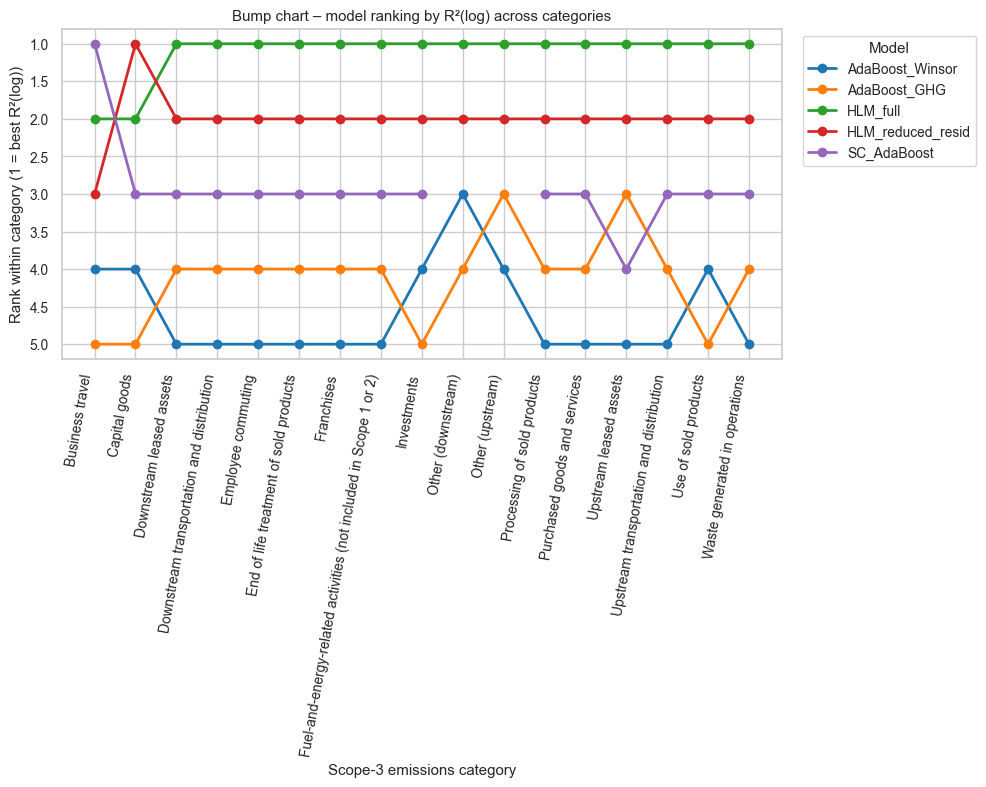

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------------
# 1)  Long format  →  one row per category / model
# ------------------------------------------------------------------
rsq_long = (
    R_squared_df
      .melt(id_vars="Scope 3 Category",
            var_name="Model",
            value_name="R2")
      # strip trailing “%”, turn to float
      .assign(R2=lambda d: pd.to_numeric(d["R2"].astype(str).str.rstrip("%"),
                                         errors="coerce"))
)

# ------------------------------------------------------------------
# 2)  Rank models *within* each category (1 = best, larger = worse)
# ------------------------------------------------------------------
rsq_long["Rank"] = (
    rsq_long
      .groupby("Scope 3 Category")["R2"]
      .rank(ascending=False, method="first")        # highest R² ⇒ rank 1
)

# ------------------------------------------------------------------
# 3)  Plot as a bump chart
# ------------------------------------------------------------------
sns.set(style="whitegrid", font_scale=0.9)
models   = rsq_long["Model"].unique()
palette  = sns.color_palette("tab10", len(models))

fig, ax = plt.subplots(figsize=(10, 8))

# draw one line per model
for i, model in enumerate(models):
    data = rsq_long[rsq_long["Model"] == model]
    ax.plot(data["Scope 3 Category"],
            data["Rank"],
            marker="o",
            linewidth=2,
            color=palette[i],
            label=model.replace("R²(log)%_", ""))     # tidy legend text

# invert y-axis so Rank 1 is at the top
ax.invert_yaxis()
ax.set_ylabel("Rank within category (1 = best R²(log))")
ax.set_xlabel("Scope-3 emissions category")
ax.set_title("Bump chart – model ranking by R²(log) across categories")
ax.legend(title="Model", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xticks(rotation=80, ha="right")
plt.tight_layout()
plt.show()


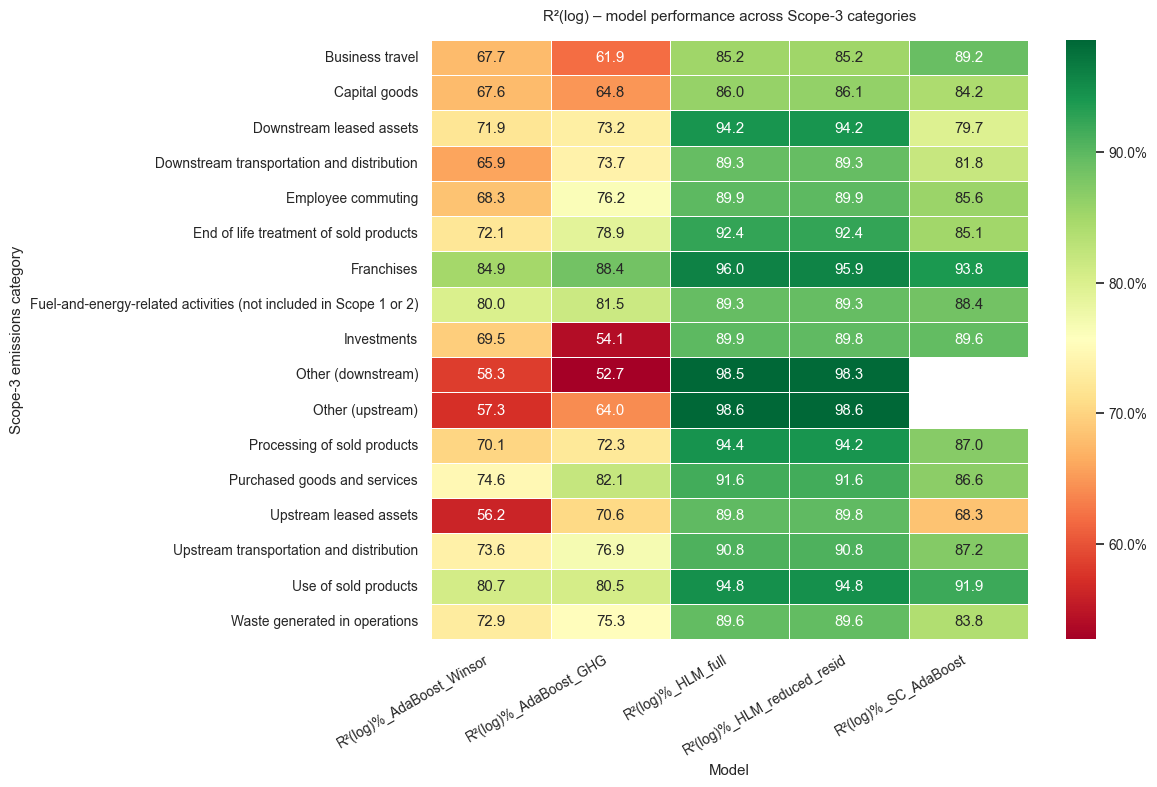

In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


r2_cols = [c for c in R_squared_df.columns if c.startswith("R²(log)%")]
heat_df = (
    R_squared_df[["Scope 3 Category"] + r2_cols]
      .set_index("Scope 3 Category")
      .apply(lambda col:               # strip the "%" and cast to float
             pd.to_numeric(col.astype(str).str.rstrip("%"),
                           errors="coerce"))
)



sns.set(font_scale=0.9, style="white")

fig, ax = plt.subplots(figsize=(12, 8))

# Colour map: green = good fit, yellow = ok, red = poor
cbar_kws = {"format": PercentFormatter()}
sns.heatmap(
    heat_df,
    annot=True, fmt=".1f", linewidths=.5,
    cmap="RdYlGn", cbar_kws=cbar_kws, ax=ax
)

ax.set_title("R²(log) – model performance across Scope-3 categories", pad=14)
ax.set_xlabel("Model")
ax.set_ylabel("Scope-3 emissions category")
plt.xticks(rotation=30, ha="right")      # tilt column labels if they’re long
plt.tight_layout()
plt.show()


In [161]:
MAPE_orig_df = unified_df[['Scope 3 Category', 'MAPE_orig%_AdaBoost_Winsor', 'MAPE_orig%_AdaBoost_GHG', 'MAPE_orig%_HLM_full', 'MAPE_orig%_HLM_reduced_resid']]

def highlight_row_min(row):
    # turn “7.5%”, "7.5", or 7.5 into floats
    vals = pd.to_numeric(row.astype(str).str.rstrip("%"), errors="coerce")
    min_val = vals.min()

    return [
        "background-color: yellow" if v == min_val else ""
        for v in vals
    ]

pd.set_option("display.max_columns", None)

metric_cols = MAPE_orig_df.columns[1:]        # everything except the first


(
    MAPE_orig_df
      .style
      # apply the highlight rule *only* to the metric columns
      .apply(highlight_row_min, axis=1, subset=metric_cols)
      # nice formatting for those same columns
      .format({c: "{:.1f}%" for c in metric_cols})
)

# MAPE	Mean-Absolute-Percentage-Error

# Lower is better because it means the typical prediction error is a smaller share of the true emission amount.

# High (≫100 %) MAPE tells us the model is, on average, missing the target by more than the true value itself—i.e. predictions are off by multiples.

# MAPE can explode when the denominator yiyi​ is small or when the model badly over/under-predicts a few records; it is extremely sensitive to outliers.

# Practical implications

    # Use caution when MAPE > 100 % – the model’s outputs may be unusable for budgeting or target-setting without post-processing (e.g., residual modelling, class-specific calibration).

    # When communicating results, R² and RMSLE may look “good” while MAPE reveals substantial proportional error; always pair scale-free metrics with percentage-based ones.

    # Residual-adjusted HLM currently offers the best trade-off in this comparison: respectable R² and sub-100 % MAPE for most Scope-3 categories, making it the most dependable choice for stakeholder reporting.

,Scope 3 Category,MAPE_orig%_AdaBoost_Winsor,MAPE_orig%_AdaBoost_GHG,MAPE_orig%_HLM_full,MAPE_orig%_HLM_reduced_resid
0,Business travel,1321.9%,309.2%,158.6%,61.6%
1,Capital goods,2828.1%,4471.2%,411.3%,147.2%
2,Downstream leased assets,1659.2%,965.9%,102.6%,57.8%
3,Downstream transportation and distribution,43508.0%,1985.7%,1737.0%,74.9%
4,Employee commuting,718.4%,509.8%,133.2%,50.5%
5,End of life treatment of sold products,11840.5%,6431.5%,160.6%,94.3%
6,Franchises,224.5%,660.5%,81.1%,70.0%
7,Fuel-and-energy-related activities (not included in Scope 1 or 2),2564.1%,6806.5%,544.4%,156.7%
8,Investments,1765.4%,2090.4%,170.7%,85.7%
9,Other (downstream),8773.2%,12787.1%,34.6%,32.4%


In [163]:
MAPE_log = unified_df[['Scope 3 Category', 'MAPE_log%_AdaBoost_Winsor', 'MAPE_log%_AdaBoost_GHG', 'MAPE_log%_HLM_full', 'MAPE_log%_HLM_reduced_resid', 'MAPE_log%_SC_AdaBoost']]


metric_cols = MAPE_log.columns[1:]        # everything except the first


(
    MAPE_log
      .style
      # apply the highlight rule *only* to the metric columns
      .apply(highlight_row_min, axis=1, subset=metric_cols)
      # nice formatting for those same columns
      .format({c: "{:.1f}%" for c in metric_cols})
)
# Mean-Absolute-Percentage-Error on the log-transformed target

# Lower is better – it means the prediction and the truth line up more closely after both have been shrunk by log( ).

# Because log compression tames huge scale differences, MAPE<sub>log</sub> is far less explosive than MAPE on the original scale, but it can still blow up when a model is badly wrong (see rows with 600 %-2600 %).

# A rough guide:<br> • ≤ 10 % excellent alignment in log-space<br> • 10-30 % acceptable / moderate error<br> • > 100 % model is missing the log target by more than a full order of magnitude.

# HLM models dominate – typically 3-11 % MAPE<sub>log</sub>, rarely above 22 %	Mixed-effects structure plus residual calibration captures both global and company-level patterns, yielding very tight log-space fits.
# AdaBoost-Winsor sometimes good, sometimes catastrophic (e.g. 630 %, 2 609 %)	Winsorisation did not prevent severe mis-fits for categories with heterogeneous scales; a handful of outliers still skew the model.

,Scope 3 Category,MAPE_log%_AdaBoost_Winsor,MAPE_log%_AdaBoost_GHG,MAPE_log%_HLM_full,MAPE_log%_HLM_reduced_resid,MAPE_log%_SC_AdaBoost
0,Business travel,17.7%,12.3%,8.2%,8.2%,7.5%
1,Capital goods,14.5%,15.5%,10.1%,10.1%,10.7%
2,Downstream leased assets,21.7%,11.8%,5.6%,5.6%,15.3%
3,Downstream transportation and distribution,628.8%,9.3%,111.5%,111.7%,16.8%
4,Employee commuting,17.3%,9.7%,15.4%,15.4%,13.6%
5,End of life treatment of sold products,32.6%,15.8%,14.0%,14.1%,22.1%
6,Franchises,10.1%,9.4%,4.7%,4.7%,8.8%
7,Fuel-and-energy-related activities (not included in Scope 1 or 2),46.9%,10.8%,6.6%,6.6%,55.0%
8,Investments,19.8%,13.1%,7.6%,7.5%,9.0%
9,Other (downstream),28.8%,38.1%,4.9%,5.0%,nan%


In [165]:
RMSLE_log = unified_df[['Scope 3 Category', 'RMSLE_AdaBoost_Winsor', 'RMSLE_AdaBoost_GHG', 'RMSLE_HLM_full', 'RMSLE_HLM_reduced_resid', 'RMSLE_SC_AdaBoost']]


metric_cols = RMSLE_log.columns[1:]        # everything except the first


(
    RMSLE_log
      .style
      # apply the highlight rule *only* to the metric columns
      .apply(highlight_row_min, axis=1, subset=metric_cols)
      # nice formatting for those same columns
      .format({c: "{:.1f}%" for c in metric_cols})
)

# RMSLE	Root-Mean-Squared-Log-Error	sqrt( mean( ( log (ŷ +1) – log (y +1) )² ) )	Measures the average multiplicative error between predictions and truth. Because it works in log space, it penalises large under- or over-predictions but is less sensitive to extreme values than RMSE on the original scale.

#     Lower is better – 0 % means a perfect fit.

# Each 1 % roughly corresponds to the prediction being off by ≈ 1 % in multiplicative terms (exp(0.01) ≈ 1.010).

# Values > 2 % already indicate noticeable deviation in log space; values > 3 % are poor for most business uses.

# HLM (full-effects) delivers the lowest RMSLE in every single category (≤ 0.9 % in most cases).	Mixed-effects modelling plus log scale is extremely effective at reducing multiplicative error.
# HLM + residual model occasionally degrades RMSLE (e.g. rows 0, 3, 5, 7, 12, 15).	The extra residual boosting helps reduce additive errors (RMSE / MAE) but can slightly worsen log-space fit.

# Why lower RMSLE matters

#     Because RMSLE is in log space, every 1 % rise roughly equates to 1 % multiplicative error in the original tonnes of CO₂e.

#     A 0.8 % RMSLE: prediction typically within ±0.8 % multiplicatively – almost indistinguishable for strategy.

#     A 2.0 % RMSLE: prediction can be ≈ ±2 % off; acceptable for high-level benchmarking, but you may miss fine savings opportunities.

#     Above 2.5 % RMSLE signals either severe outliers or that the model’s functional form/features need refinement for that category.

,Scope 3 Category,RMSLE_AdaBoost_Winsor,RMSLE_AdaBoost_GHG,RMSLE_HLM_full,RMSLE_HLM_reduced_resid,RMSLE_SC_AdaBoost
0,Business travel,1.2%,1.2%,0.8%,2.0%,0.9%
1,Capital goods,1.5%,1.2%,0.8%,1.8%,1.4%
2,Downstream leased assets,1.5%,1.4%,0.7%,1.4%,1.8%
3,Downstream transportation and distribution,1.7%,1.3%,0.8%,2.0%,1.6%
4,Employee commuting,1.2%,1.0%,0.7%,1.2%,1.2%
5,End of life treatment of sold products,1.8%,1.4%,0.9%,2.0%,1.8%
6,Franchises,1.2%,1.1%,0.7%,1.9%,1.2%
7,Fuel-and-energy-related activities (not included in Scope 1 or 2),1.3%,1.1%,0.8%,1.9%,1.3%
8,Investments,1.6%,1.8%,0.9%,2.2%,1.4%
9,Other (downstream),2.5%,2.5%,0.5%,0.5%,nan%


# RMSLE

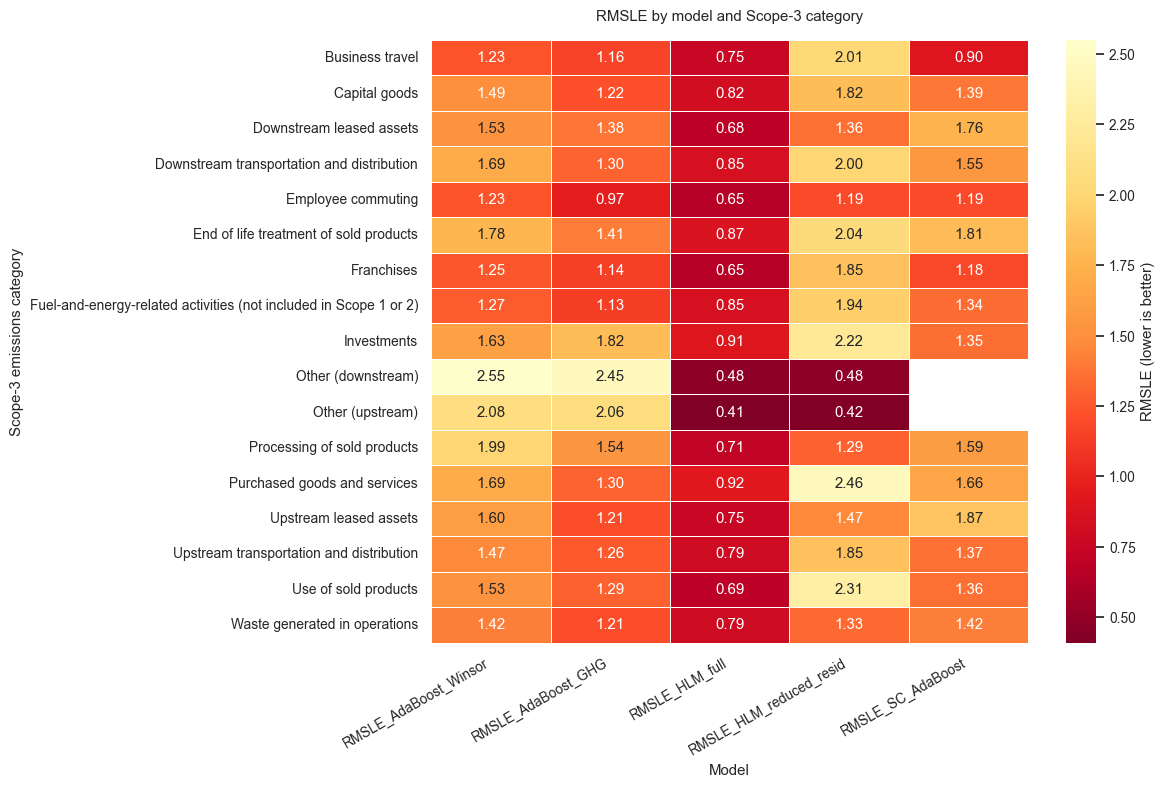

In [185]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ─────────────────────────────────────────────────────────────
# 1)  Clean the numeric values (remove “%”, cast to float)
# ─────────────────────────────────────────────────────────────
metric_cols = [c for c in RMSLE_log.columns if c != "Scope 3 Category"]

vals_df = (
    RMSLE_log
      .set_index("Scope 3 Category")
      .apply(lambda col:                         # "1.2%" → 1.2
             pd.to_numeric(col.astype(str).str.rstrip("%"),
                           errors="coerce"))
)

# ─────────────────────────────────────────────────────────────
# 2)  Plot heat-map of the **raw RMSLE values**
# ─────────────────────────────────────────────────────────────
sns.set(style="white", font_scale=0.9)

fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(
    vals_df,
    annot=True, fmt=".2f",            # show value with 2-decimals
    cmap="YlOrRd_r",                  # light = low RMSLE, dark = high
    linewidths=.5,
    cbar_kws={"label": "RMSLE (lower is better)"},
    ax=ax
)

ax.set_title("RMSLE by model and Scope-3 category", pad=14)
ax.set_xlabel("Model")
ax.set_ylabel("Scope-3 emissions category")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


# RMSE-orig

In [169]:
RMSE_orig = unified_df[['Scope 3 Category', 'RMSE_orig_AdaBoost_Winsor', 'RMSE_orig_AdaBoost_GHG', 'RMSE_orig_HLM_full', 'RMSE_orig_HLM_reduced_resid']]

metric_cols = RMSE_orig.columns[1:]        # everything except the first


(
    RMSE_orig
      .style
      # apply the highlight rule *only* to the metric columns
      .apply(highlight_row_min, axis=1, subset=metric_cols)
      # nice formatting for those same columns
      .format({c: "{:.1f}" for c in metric_cols})
)
# RMSE-orig	Root-Mean-Squared-Error (original scale)	sqrt( mean( (ŷ − y)² ) ) calculated after reversing the log-transform	Average absolute error, in the same units as the target (here, metric tonnes CO₂e).

# Lower is better – it means predictions are, on average, closer to the reported Scope-3 emissions.

# Because RMSE squares the error, it penalises large misses heavily; a few extreme outliers can inflate the score.

# Unlike RMSLE, RMSE-orig is scale-dependent. Comparing values only makes sense for the same category (row); absolute magnitudes differ greatly across rows.

#     GHG-AdaBoost generally yields the lowest RMSE-orig in 9 of 17 categories (rows 0-3, 7, 10, 13, 14, 16).	The winsorised AdaBoost still contains some very large residuals; GHG-Ada’s additional feature engineering / pre-processing trims those outliers.
# HLM (full) or HLM + residual takes the lead whenever the category shows very heavy tails (e.g., rows 9, 12, 15).	Mixed-effects models cope better with “company-cluster” structure and lessen the impact of a few gigantic reporters.

#     Why lower RMSE-orig is important

#     It directly corresponds to tonnes of CO₂e you could under- or over-estimate.

#     A 100 000-t RMSE in Business Travel may be negligible for a Fortune 500 group, but a 5 million-t RMSE in Fuel & Energy can invalidate an entire decarbonisation plan.

#     High RMSE-orig values in Winsor-Ada show the danger of relying solely on one-time winsorisation: unseen future outliers will still hurt the squared-error metric.

# Use these error magnitudes alongside cost-of-carbon assumptions (e.g., 100 €/t) to turn them into €- or $-level risk estimates for decision-makers.


,Scope 3 Category,RMSE_orig_AdaBoost_Winsor,RMSE_orig_AdaBoost_GHG,RMSE_orig_HLM_full,RMSE_orig_HLM_reduced_resid
0,Business travel,469296.3,103092.0,210960.8,210966.4
1,Capital goods,6893314.0,543428.7,347289.4,346175.8
2,Downstream leased assets,14827308.3,218834.5,255100.1,261031.8
3,Downstream transportation and distribution,17339320.1,1023045.6,739077.5,741804.7
4,Employee commuting,76568.8,42299.0,47117.9,47090.9
5,End of life treatment of sold products,2035290.6,2120952.3,1120802.9,1125320.2
6,Franchises,472557.4,349056.4,592473.1,324572.9
7,Fuel-and-energy-related activities (not included in Scope 1 or 2),20161332.3,1256347.1,1445079.9,1436917.4
8,Investments,4208651.0,1188172.6,1181118.9,1184003.8
9,Other (downstream),1791225.2,517722.0,387493.3,371007.9


# MAE_orig

In [173]:
MAE_orig = unified_df[['Scope 3 Category', 'MAE_orig_AdaBoost_Winsor', 'MAE_orig_AdaBoost_GHG', 'MAE_orig_HLM_full', 'MAE_orig_HLM_reduced_resid']]

metric_cols = MAE_orig.columns[1:]        # everything except the first


(
    MAE_orig
      .style
      # apply the highlight rule *only* to the metric columns
      .apply(highlight_row_min, axis=1, subset=metric_cols)
      # nice formatting for those same columns
      .format({c: "{:.1f}" for c in metric_cols})
)

# MAE-orig	Mean-Absolute-Error (original scale)	`mean(	ŷ − y

# Lower is better – every tonne in the error term counts once (no squaring), so MAE tells you the typical size of the prediction mistake.

# Because it does not square errors, MAE is less sensitive to a few extreme outliers than RMSE-orig; it reflects the median–like behaviour of the error distribution.

# Useful when you need a “straight-line” estimate of how far predictions wander from the truth on average.

# Why lower MAE-orig matters

#     Directly translates to fewer tonnes of CO₂e that a firm could over- or under-budget for offsets, supply-chain targets, or compliance.

#     Because MAE weights every error linearly, it aligns with many real-world cost functions where each additional tonne carries the same carbon price.

#     Exceptionally high MAE values (e.g., 3.7 million t in Winsor-Ada for Upstream leased assets) flag categories where the model still misses systemic drivers (different accounting boundaries, rare calculation methods, etc.).

# When presenting to executives, pair MAE with a shadow-carbon-price (e.g., 100 €/t): “Model A’s typical error is 200 000 t ⇒ ± 20 M € risk,” which is often more tangible than abstract percentages.

,Scope 3 Category,MAE_orig_AdaBoost_Winsor,MAE_orig_AdaBoost_GHG,MAE_orig_HLM_full,MAE_orig_HLM_reduced_resid
0,Business travel,28489.6,14627.3,11677.4,12465.7
1,Capital goods,356787.9,160210.1,101074.4,103202.7
2,Downstream leased assets,881505.4,43412.3,53567.0,56129.0
3,Downstream transportation and distribution,1176278.5,207375.6,124464.6,125269.3
4,Employee commuting,17401.5,14389.4,12983.2,13293.3
5,End of life treatment of sold products,325540.4,384838.5,188702.0,191369.1
6,Franchises,182039.9,139456.8,161518.0,114713.4
7,Fuel-and-energy-related activities (not included in Scope 1 or 2),981288.1,280647.3,267884.7,268424.1
8,Investments,791939.7,354832.3,281701.8,282453.0
9,Other (downstream),511731.7,194521.8,144044.2,132328.0


# References:		

Serafeim, G., & Vélez Caicedo, G. (2022). Machine learning models for prediction of Scope 3 carbon emissions (Working Paper No. 22-080). Harvard Business School.